<center><img src="https://www.pymnts.com/wp-content/uploads/2022/07/Adidas.jpg?w=620" width="500" height="300"></center>

# Cursos de Series de tiempo con *Machine Learning*
## Modulo . Caso de estudio
                        Elaborado por: Naren Castellon

# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](#10)
11. [Conclusion](#11)
12. [References](12)

<a id="1"></a> 
# **Introduction**

La modelación de series de tiempo es una herramienta esencial en el análisis y pronóstico de ventas, y su aplicación al contexto del pronóstico de ventas de la marca ADIDAS resulta de gran relevancia. ADIDAS es una reconocida marca global de artículos deportivos, conocida por su amplia gama de productos y su presencia en múltiples mercados.

El pronóstico preciso de las ventas de ADIDAS es fundamental para la planificación estratégica, la gestión de inventario, la toma de decisiones y el logro de los objetivos comerciales. La modelación de series de tiempo permite analizar y predecir los patrones y tendencias inherentes a los datos históricos de ventas, lo que ayuda a identificar los factores clave que influyen en el rendimiento de la marca y a tomar decisiones fundamentadas sobre la producción, distribución y estrategias de marketing.

Al modelar las series de tiempo de las ventas de ADIDAS, se consideran diversos factores y variables, como la estacionalidad en la demanda de productos deportivos, las tendencias a largo plazo, los efectos promocionales, eventos deportivos importantes y otros factores económicos o sociales que pueden afectar las ventas de la marca. Estos factores se capturan mediante la aplicación de modelos de series de tiempo, como los modelos ARIMA, SARIMA, modelos de suavizamiento exponencial o modelos de redes neuronales, entre otros.

La modelación de series de tiempo proporciona una visión profunda del comportamiento pasado de las ventas de ADIDAS y ayuda a predecir las ventas futuras de manera más precisa. Esto permite a la marca ADIDAS tomar decisiones estratégicas, optimizar la producción, planificar campañas de marketing y gestionar eficientemente el inventario en función de las demandas y patrones identificados.

En resumen, la modelación de series de tiempo aplicada al pronóstico de ventas de la marca ADIDAS es una herramienta valiosa para comprender y predecir el rendimiento de la marca en función de los datos históricos. Esto ayuda a ADIDAS a tomar decisiones informadas y estratégicas, mejorando su capacidad para anticipar la demanda del mercado y mantener una ventaja competitiva en la industria de artículos deportivos.

<a id="2"></a>
# **Case study**

En este estudio de caso, exploraremos cómo la modelación de series de tiempo puede aplicarse al pronóstico de ventas de ADIDAS. ADIDAS es una reconocida marca global de artículos deportivos que opera en múltiples mercados y ofrece una amplia gama de productos. El pronóstico preciso de las ventas es esencial para ADIDAS, ya que les permite planificar de manera efectiva la producción, gestionar el inventario y tomar decisiones estratégicas para maximizar los ingresos.

Para llevar a cabo este estudio de caso, utilizaremos un conjunto de datos históricos de ADIDAS. Los datos incluirán información sobre las ventas totales, region, precio unitario de venta, junto con otras variables relevantes que puedan influir en las ventas, como promociones, eventos deportivos, cambios estacionales y factores económicos. El objetivo es utilizar estos datos para construir un modelo de series de tiempo que pueda predecir las ventas futuras de ADIDAS.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Sales Forecast.

En base al análisis de las series de tiempo de las ventas de ADIDAS y la construcción de modelos adecuados, podemos obtener pronósticos precisos que ayuden a ADIDAS en la toma de decisiones estratégicas. La modelación de series de tiempo proporciona una herramienta poderosa para comprender y predecir las fluctuaciones en las ventas de la marca, así como para identificar patrones estacionales, tendencias a largo plazo y otros factores que influyen en el rendimiento de ADIDAS. Esto permite a la marca anticipar la demanda, ajustar la producción y el inventario, y diseñar estrategias de marketing efectivas para maximizar el rendimiento comercial.

## **Load Library**

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/nixtla-env/lib/python3.11/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/Users/user/Documents/miniconda3/envs/nixtla-env/lib/python3.11/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.5


# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

## **About Dataset**

The following data set has the following attributes:

- Retailer: The entity or organization selling Adidas products.
- Retailer ID: A unique identifier for each retailer.
- Invoice Date: The date when the sales transaction occurred.
- Region: The geographical region where the retailer operates.
- State: The state within the region where the retailer is located.
- City: The city where the retailer is situated.
- Product: The Adidas product being sold.
- Price per Unit: The cost of one unit of the Adidas product.
- Units Sold: The number of units of the Adidas product sold in a particular transaction.
- Total Sales: The total revenue generated from the sale of Adidas products in a transaction.
- Operating Profit: The profit earned by the retailer from the sale after deducting operating costs.
- Operating Margin: The percentage of operating profit in relation to total sales.
- Sales Method: The method or channel through which the sales transaction occurred.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Adidas%20US%20Sales%20Data.csv",sep=";")
#df.columns = df.iloc[3]
#df = df.iloc[4:,1:].reset_index(drop=True)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/20,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,01/02/20,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,01/03/20,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,01/04/20,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,01/05/20,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [4]:
# We eliminate the dollar sign and the space from the comma
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.replace(',', '')
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.replace(',', '')
df["Units Sold"]=df["Units Sold"].str.replace(',', '')

# Remove the % sign and divide by 100
df['Operating Margin']=df['Operating Margin'].str[:-1].astype(float)
df['Operating Margin'] = df['Operating Margin'] / 100

In [5]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date']) #Changing datatype of Invoice Date to datetime

In [6]:
df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit']] = df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit']].astype("float")

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [7]:
df["unique_id"]="1"
df=df.rename(columns={"Invoice Date": "ds", "Total Sales": "y"})
df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,unique_id
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   ds                9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   y                 9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  unique_id         9648 non-null   object        
dtypes: datetime64[ns](1), fl

<a id="3"></a>
# **Explore Data with the plot method**

In [8]:
df['Total Cost'] = df['y'] - df['Operating Profit']
df['Product Cost'] = df['Price per Unit'] - (df['Price per Unit'] * df['Operating Margin'])
df['Year'] = pd.to_datetime(df['ds']).dt.year
df['Month'] = pd.to_datetime(df['ds']).dt.month
df['Day'] = pd.to_datetime(df['ds']).dt.day
df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,unique_id,Total Cost,Product Cost,Year,Month,Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1,300000.0,25.00,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1,350000.0,35.00,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1,260000.0,26.00,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1,248625.0,29.25,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1,378000.0,42.00,2020,1,5


<Axes: xlabel='y', ylabel='Product'>

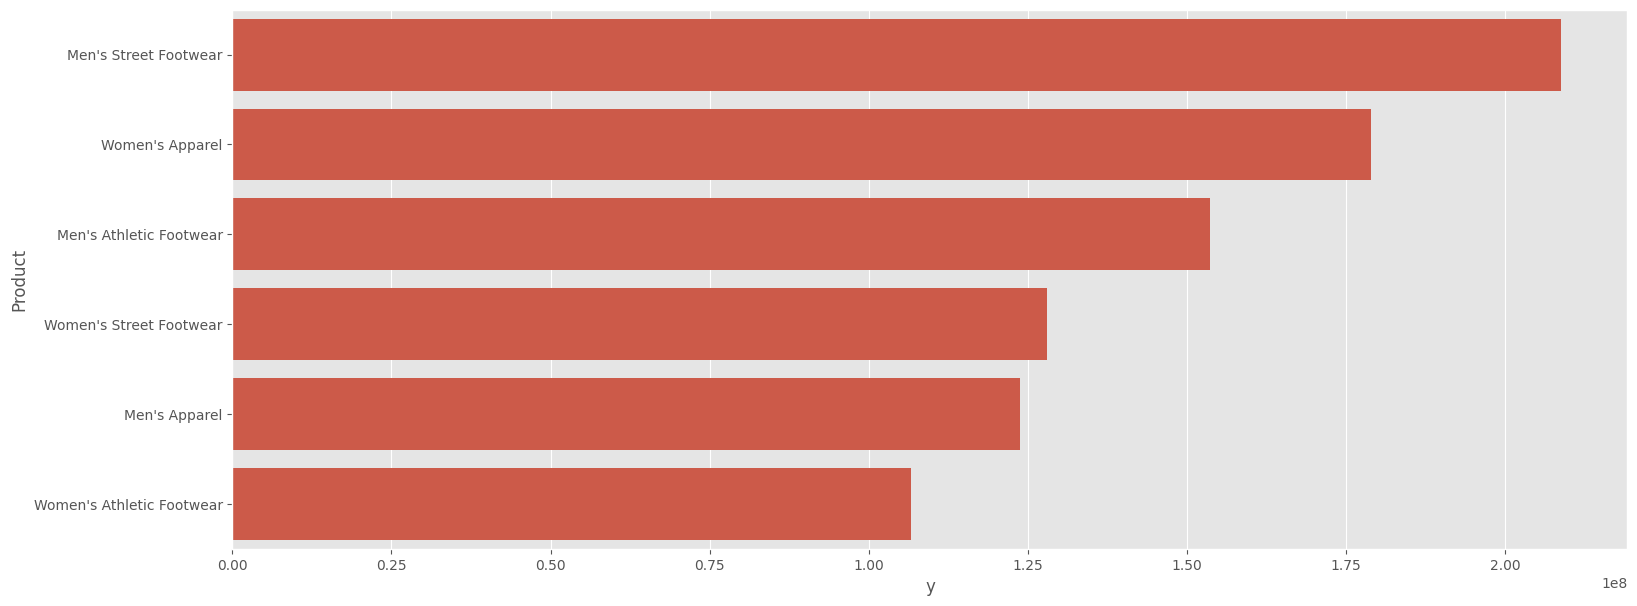

In [9]:
# TOP SELLING PRODUCTS

top_selling_products = df.groupby('Product')['y'].sum().sort_values(ascending=False).reset_index()
top_selling_products.index+=1
sns.barplot(data=top_selling_products,y='Product',x='y')

Observations

- The top selling category is Men's Street Footwear, followed by Women's Apparel.
- Men's Athletic Footwear holds 3rd place.
- Women's Athletic Footwear holds last place.

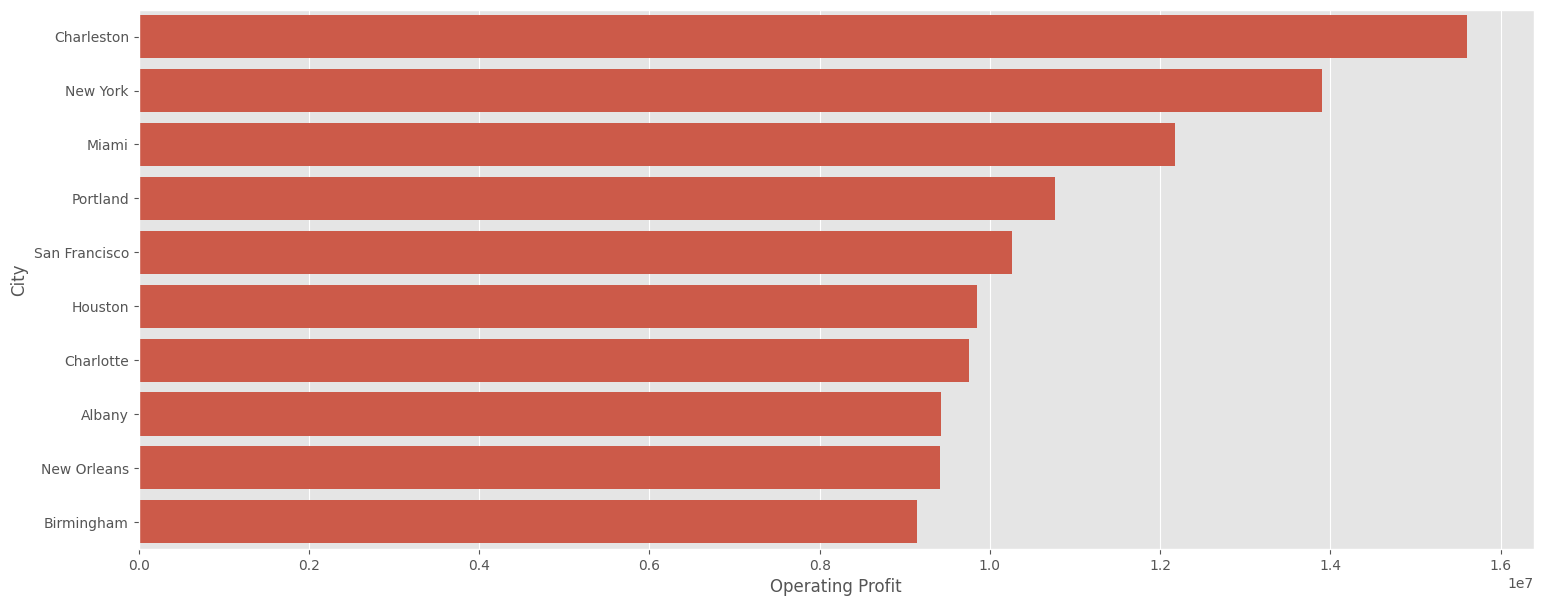

In [11]:
# TOP CITIES

grossing_cities = df.groupby('City')['Operating Profit'].sum().sort_values(ascending=False).reset_index().head(10)
grossing_cities.index+=1
sns.barplot(data=grossing_cities,y='City',x='Operating Profit');

### **Top and Bottom Selling State and City**

In [12]:
df['City_State'] = df['City'] + ', ' + df['State'] #Considering city names alone does not make sense, as some states have common city names.

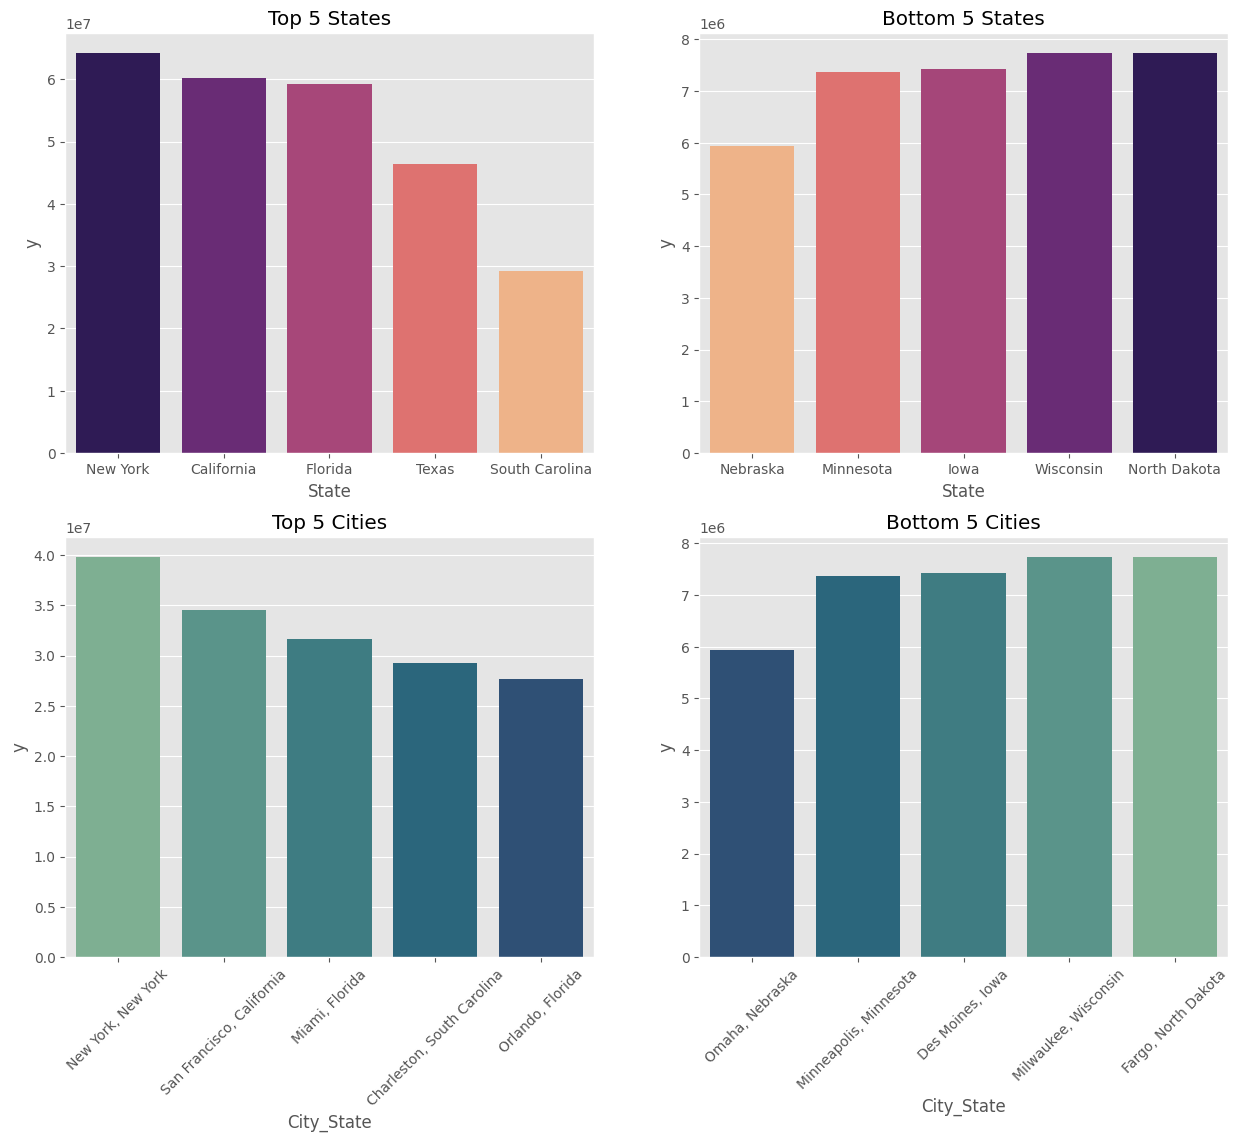

In [13]:
top_states = df.groupby('State')['y'].sum().nlargest(5).reset_index()
bottom_states = df.groupby('State')['y'].sum().nsmallest(5).reset_index()

top_cities = df.groupby('City_State')['y'].sum().nlargest(5).reset_index()
bottom_cities = df.groupby('City_State')['y'].sum().nsmallest(5).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='State', y='y', data=top_states,palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 States')
axes[0, 0].tick_params(axis='x', )

sns.barplot(x='State', y='y', data=bottom_states,palette='magma_r', ax=axes[0, 1])
axes[0, 1].set_title('Bottom 5 States')
axes[0, 1].tick_params(axis='x', )

sns.barplot(x='City_State', y='y', data=top_cities,palette='crest', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Cities')
axes[1, 0].tick_params(axis='x', rotation=45) 

sns.barplot(x='City_State', y='y', data=bottom_cities, palette='crest_r' , ax=axes[1, 1])
axes[1, 1].set_title('Bottom 5 Cities')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

Observations

- New York state holds first place with total sales of 64.22 million dollars.
- California and Florida have close competition for second place
- Nebraska is the least-selling state with 5.92 million dollars.
- While the other 4 states (Minnesota, Iowa, Wisconsin, North Dakota) in the bottom 5 have sales of around 7 million dollars.
- New York City holds first place with sales of 39.80 million dollars, followed by San Francisco with sales of 34.53 million dollars.
- Omaha is the least-selling city with 5.92 million dollars followed by Minneapolis, Des Moines, Milwaukee and Fargo

### **Sales Method by Total Sales**

In [14]:
sales_method_pie = df.groupby('Sales Method')['y'].sum().reset_index()
colors = ['#99FFDE', '#ffde99', '#de99ff']

px.pie(sales_method_pie, values='y', names='Sales Method', title='Sales Method by Total Sales', hole=0.4,color_discrete_sequence=colors)

Observations

- The majority 39.6 % of the sales are In-Store followed by Outlet at 32.8% and Online at 27.5%.

### **Price Per Product Distribution**

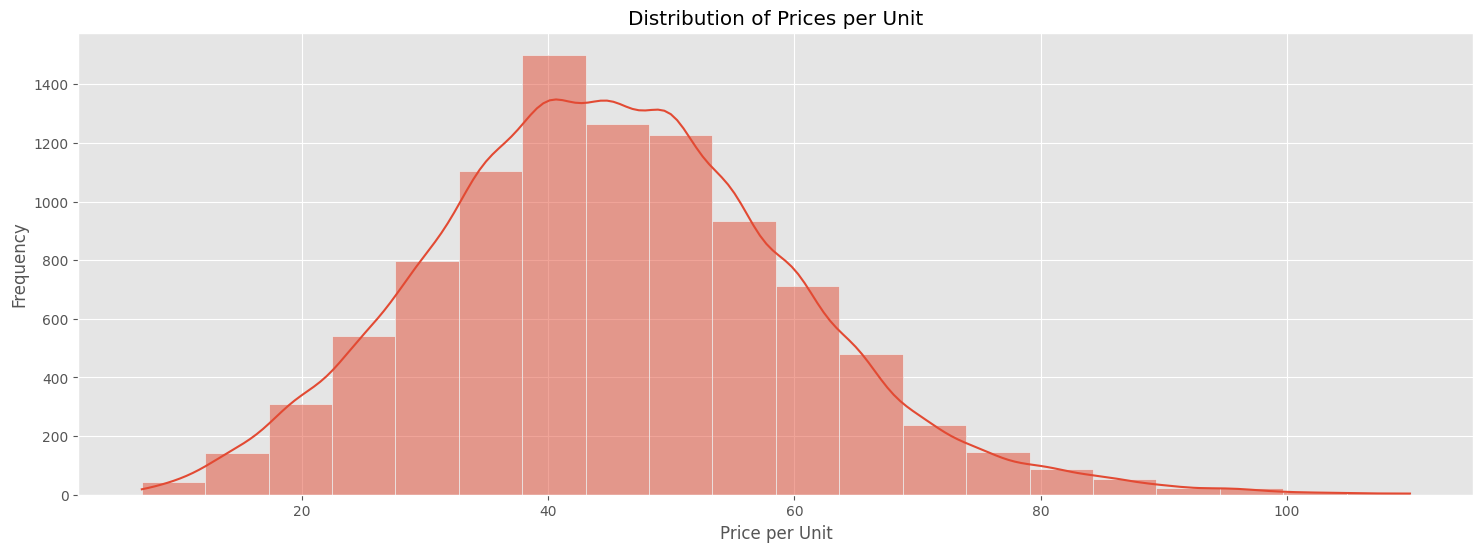

In [15]:
plt.figure(figsize=(18, 6))
sns.histplot(df['Price per Unit'], bins = 20, kde = True)
plt.title('Distribution of Prices per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

Observations

- The price per unit follows a normal distribution. It peaks at 40 dollars, which means the 40 dollars price point is the most common.
- The majority of the products have prices between 20 dollars and 80 dollars.

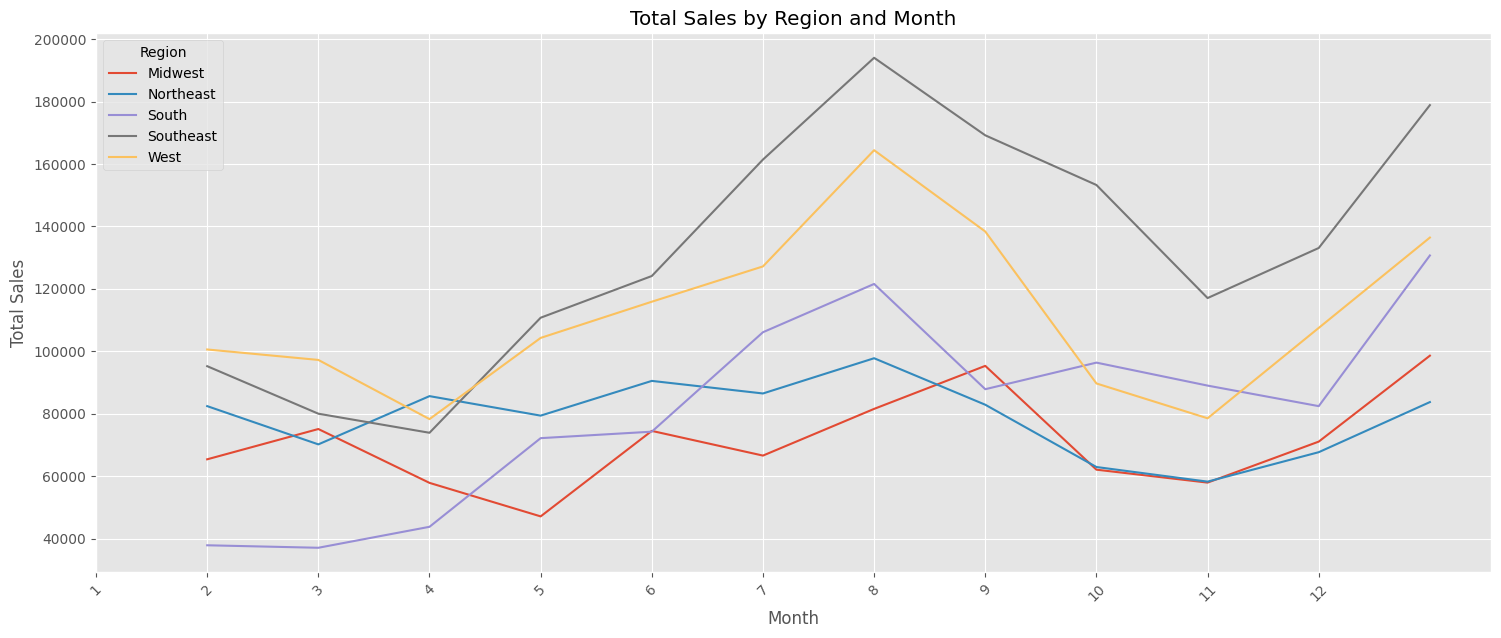

In [16]:
adidas_southeast = df.pivot_table(values='y', index='Month', columns='Region', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
#adidas_southeast = adidas_southeast.reindex(month_order)

# Plotting the pivot table
adidas_southeast.plot.line()
plt.xticks(range(len(adidas_southeast.index)), adidas_southeast.index)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()

- We have an increas in Sales at Summer times and close to Christmas Holidays

- We have two supper performing region and two underperformin and also one with average performans

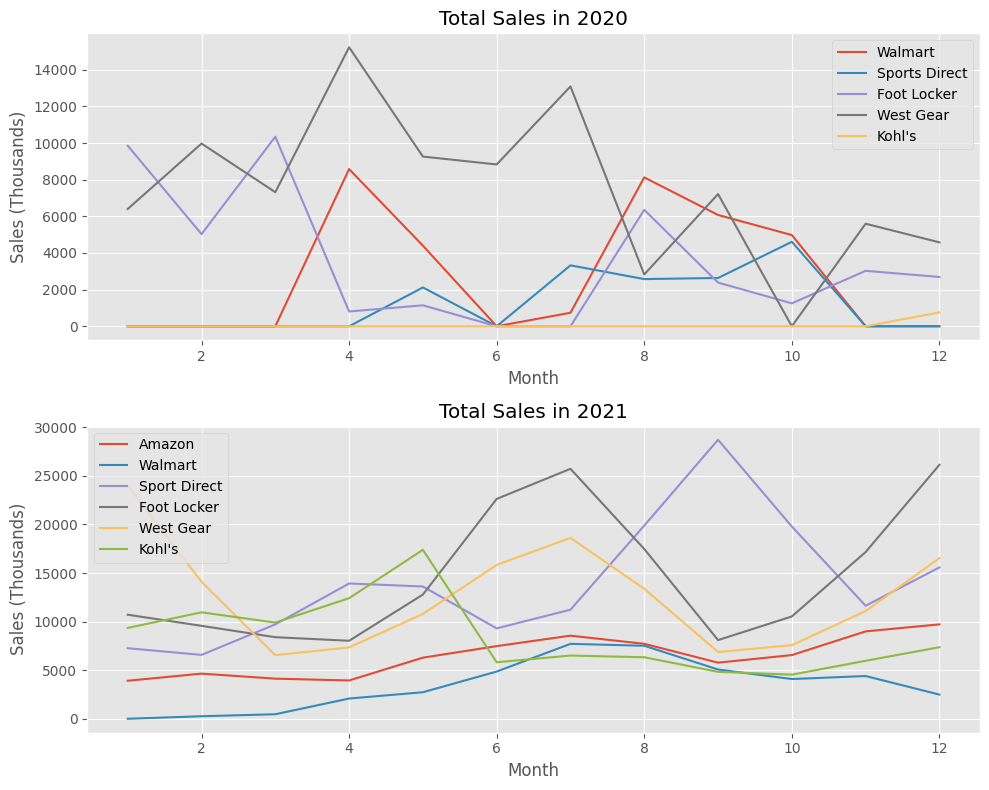

In [17]:
adidas_2020=df[df['Year']==2020]
adidas_2021=df[df['Year']==2021]

adidas_retailer_2020=pd.pivot_table(adidas_2020,values='y',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2020=(adidas_retailer_2020/1000).round(2)

adidas_retailer_2021=pd.pivot_table(adidas_2021,values='y',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2021=(adidas_retailer_2021/1000).round(2)

adidas_retailer_Thousands_2020=adidas_retailer_Thousands_2020
adidas_retailer_Thousands_2021=adidas_retailer_Thousands_2021
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020[['Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Walmart','Sports Direct','Foot Locker','West Gear'])
axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[0].set_title('Total Sales in 2020')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales (Thousands)')
axes[0].legend()

axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021[['Amazon','Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Amazon','Walmart','Sport Direct','Foot Locker','West Gear'])
axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[1].set_title('Total Sales in 2021')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales (Thousands)')
axes[1].legend()

plt.tight_layout()
plt.show()

For 2021

1. From our observation we can see that most summer sales appeared at "Foot Locker"& "West Gear"

2. But in same time we have outliers like "Sport Direct" which has an increase in sales at September while other retailers have decrease in sales

3. We have also "West Gear" one more outlier that has good sales at January

In 2020 we dont have much data to make a proper seasonal sales analysis about all retailers but with what we have "West Gear" leader in sales at summer and April ( I thin it was in times of lockdown)

It is enough for regional and retailer analysis for basic understanding of trend performance in regions and what season and retailer best performer in which month.

### **We found top Sales Product in Adidas company for last two years**

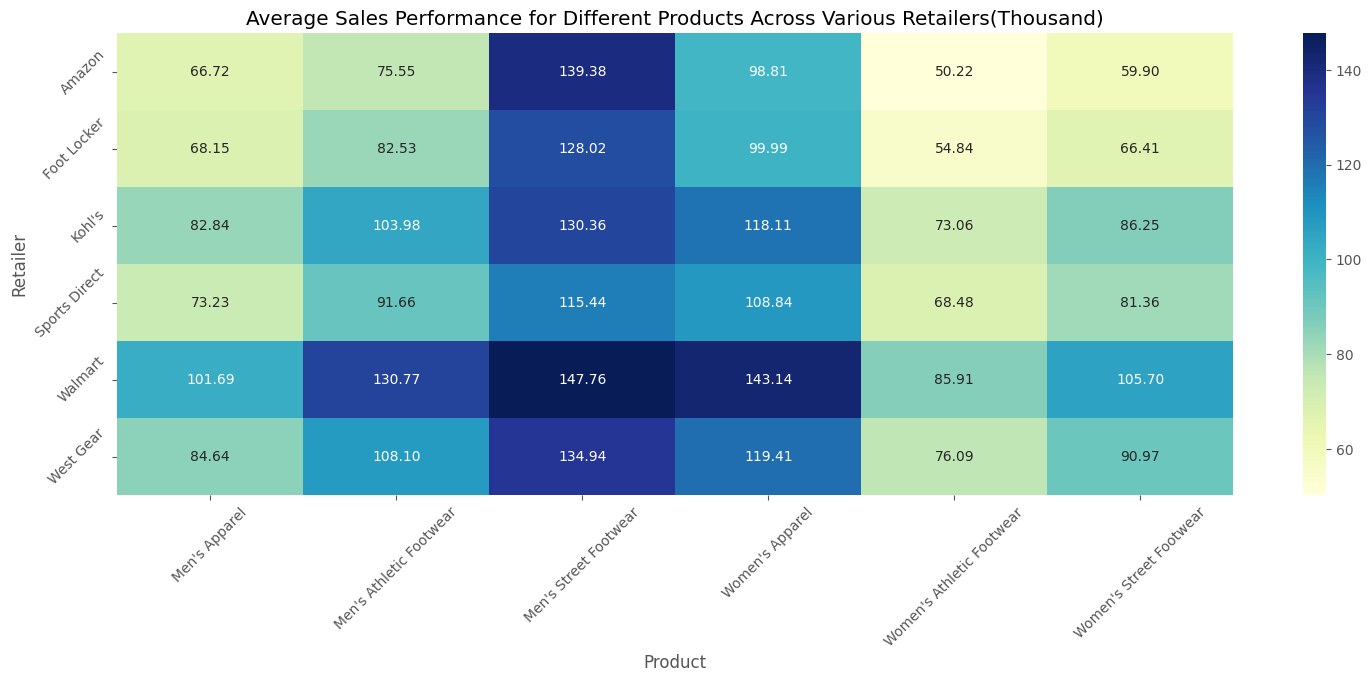

In [18]:
adidas_product_retailer_k=(df.pivot_table(values='y',index='Retailer',columns='Product',aggfunc=np.mean)/1000).round(2)

# Create heatmap
plt.figure(figsize=(18, 6))  # Adjust the figure size if needed
sns.heatmap(adidas_product_retailer_k, annot=True, fmt=".2f", cmap="YlGnBu")

# Set plot title and labels
plt.title("Average Sales Performance for Different Products Across Various Retailers(Thousand)")
plt.xlabel("Product")
plt.ylabel("Retailer")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Show the plot
plt.show()

1. Best selling product in average (Men's Street Footwear) in all our retailers

2. Also Walmart have a good performans in seling all of our products in average .

3. There is tree type of most selled average product in all our retailers and its (Men's Street Footwear,Women's Apparel,Men's Athletic Footwear)

### **Monthly Total Sales Over Years**

In [19]:
yearly_sales = df.groupby(['Year','Month'])['y'].sum().reset_index()

In [20]:
px.line(yearly_sales, x='Month', y='y', color='Year',title='Monthly Total Sales Over Years', markers=True, template= "none")

In [21]:
df.groupby('Year')['y'].sum().reset_index()

,Year,y
0,2020,182080675.0
1,2021,717821450.0


Observations

The sales have shown significant growth from 2020 to 2021.

2021

- There was a dip in sales during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
- The month of July had the highest sales with 78.33 million dollars.
- In terms of sales, March generated the lowest revenue of 39.14 million dollars.
- Total Sales 717.82 million dollars

2020

- There was a rise in sales in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
- The month of April had the highest sales with 24.60 million dollars.
- In terms of sales, December generated the lowest revenue of 8.02 million dollars.
- Total Sales 182.08 million dollars

### **Monthly Total Profit Over Years**

In [22]:
yearly_profit = df.groupby(['Year','Month'])['Operating Profit'].sum().reset_index()

In [23]:
px.line(yearly_profit, x='Month', y='Operating Profit', color='Year',title='Monthly Total Profit Over Years', markers=True, template= "simple_white")

In [24]:
pd.options.display.float_format = '{:.0f}'.format

df.groupby('Year').agg({"Operating Profit" : "sum"})

,Operating Profit
Year,
2020,63375710
2021,268759412


Observations

The Profit have shown significant growth from 2020 to 2021.

2021

- There was a dip in profit during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
- The month of July had the highest profit with 29.13 million dollars.
- In terms of profit, March generated the lowest profit of 14.57 million dollars.
- Total profit 268.75 million dollars.

2020

- There was a rise in profit in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
- The month of April had the highest profit with 9.30 million dollars.
- In terms of profit, June generated the lowest profit of 2.29 million dollars.
- Total profit 63.37 million dollars.

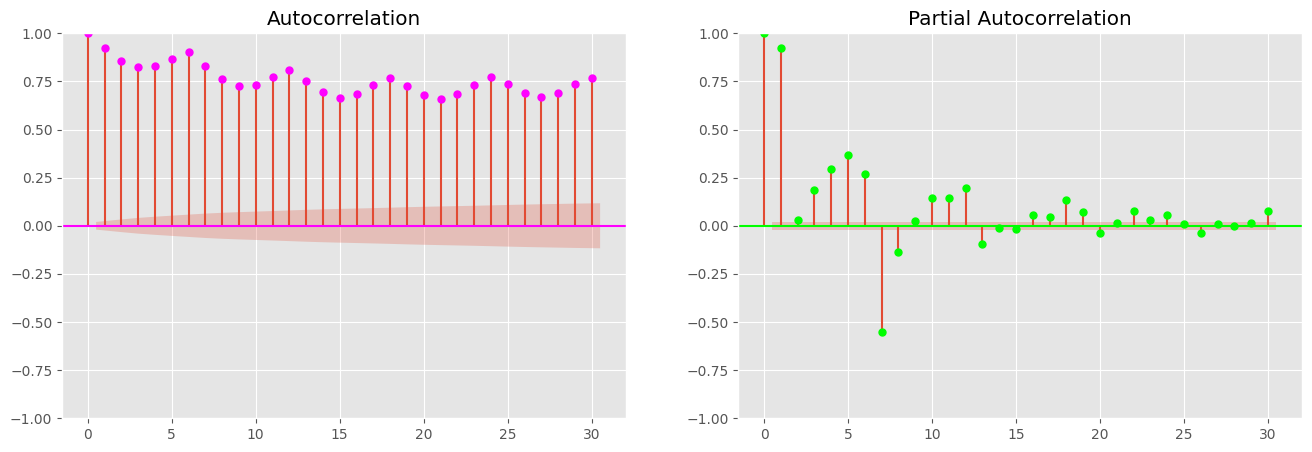

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [26]:
data=df.groupby("ds")[["y"]].sum().reset_index()
data["unique_id"]="1"
#data=data.tail(400)

In [27]:
train = data[data.ds<='2021-12-01'] 
test=data[(data['ds'] > '2021-12-01')]

train.shape, test.shape

((694, 3), (30, 3))

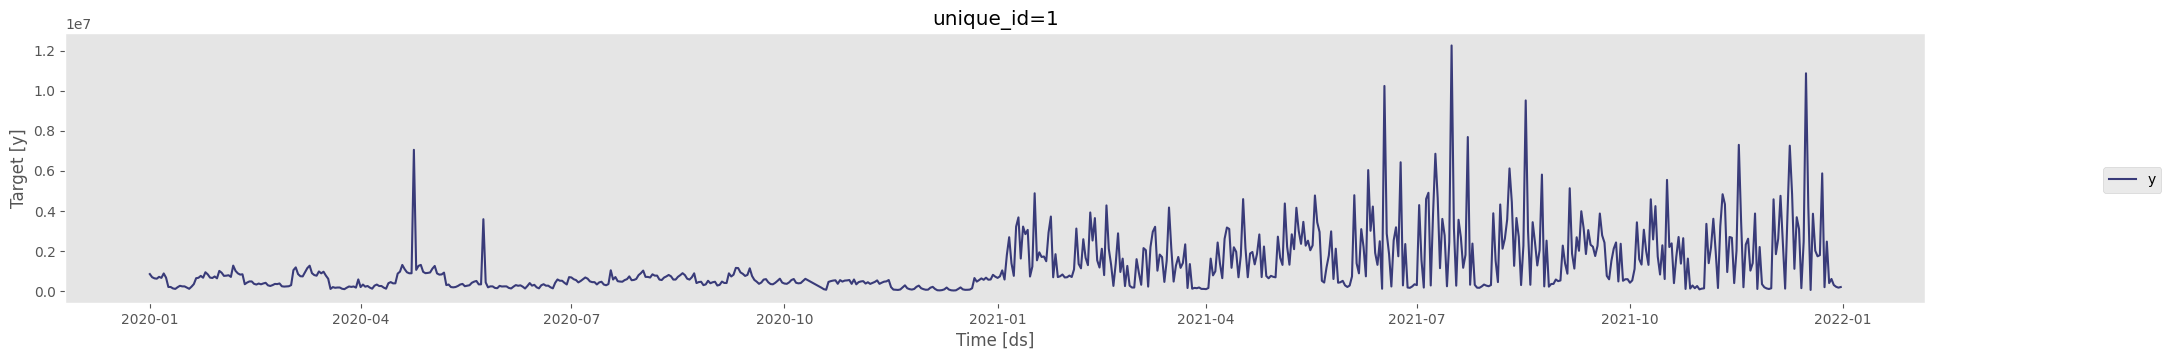

In [28]:
StatsForecast.plot(train, test)

<a id="5"></a>
# **Implementation with MLForecast**

We are going to train the `Seasonal Exponential Smoothing Optimized` model, using the `SeasonalExponentialSmoothingOptimized` function. This model will help us forecast user demand in the next 12 month.

In [29]:
# Modelo de Boosting
#===========================================================================

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.linear_model import SGDRegressor
# Modelo de Support vector
#===========================================================================
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
# Modelo de KNN
#===========================================================================
from sklearn.neighbors import KNeighborsRegressor

# Modelo de Arbol de Decision
#===========================================================================
from sklearn.tree import DecisionTreeRegressor

# Modelo de Ensemble
#===========================================================================
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

# Modelo de Redes neurales
#===========================================================================
from sklearn.neural_network import MLPRegressor

# Modelo lineales
#===========================================================================
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor

from mlforecast.target_transforms import LocalRobustScaler, LocalStandardScaler

In [31]:
# Mlforecast
# ==============================================================================
from mlforecast import MLForecast
from utilsforecast.plotting import plot_series
from mlforecast.target_transforms import Differences
from mlforecast.utils import PredictionIntervals
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from utilsforecast.preprocessing import fill_gaps

In [32]:
regresor= [ RandomForestRegressor(),
           AdaBoostRegressor(),
           DecisionTreeRegressor(),
           XGBRegressor(),
           SVR(),
           RANSACRegressor(),
           HuberRegressor(),
           TheilSenRegressor(),
           KNeighborsRegressor(),
           CatBoostRegressor(),
        ] 

In [33]:
mlf = MLForecast(models=regresor,
                 freq='D', 
                 lags=[1,2,3],
                 lag_transforms={1: [expanding_mean],7: [(rolling_mean, 7)] },
                 target_transforms=[Differences([1]), LocalRobustScaler(scale='iqr')],
                 date_features=["year", "month", "day"],
                 num_threads=2
                 ) 

In [34]:
prep = mlf.preprocess(train)
prep


,ds,y,unique_id,lag1,lag2,lag3,expanding_mean_lag1,rolling_mean_lag7_window_size7,year,month,day
14,2020-01-15,-0,1,0,0,-0,-0,-0,2020,1,15
15,2020-01-16,-0,1,-0,0,0,-0,-0,2020,1,16
16,2020-01-17,-0,1,-0,-0,0,-0,-0,2020,1,17
17,2020-01-18,-0,1,-0,-0,-0,-0,-0,2020,1,18
18,2020-01-19,0,1,-0,-0,-0,-0,-0,2020,1,19
...,...,...,...,...,...,...,...,...,...,...,...
689,2021-11-27,-6,1,7,-12,8,0,-0,2021,11,27
690,2021-11-28,-0,1,-6,7,-12,-0,-0,2021,11,28
691,2021-11-29,-0,1,-0,-6,7,-0,0,2021,11,29
692,2021-11-30,-0,1,-0,-0,-6,-0,-0,2021,11,30


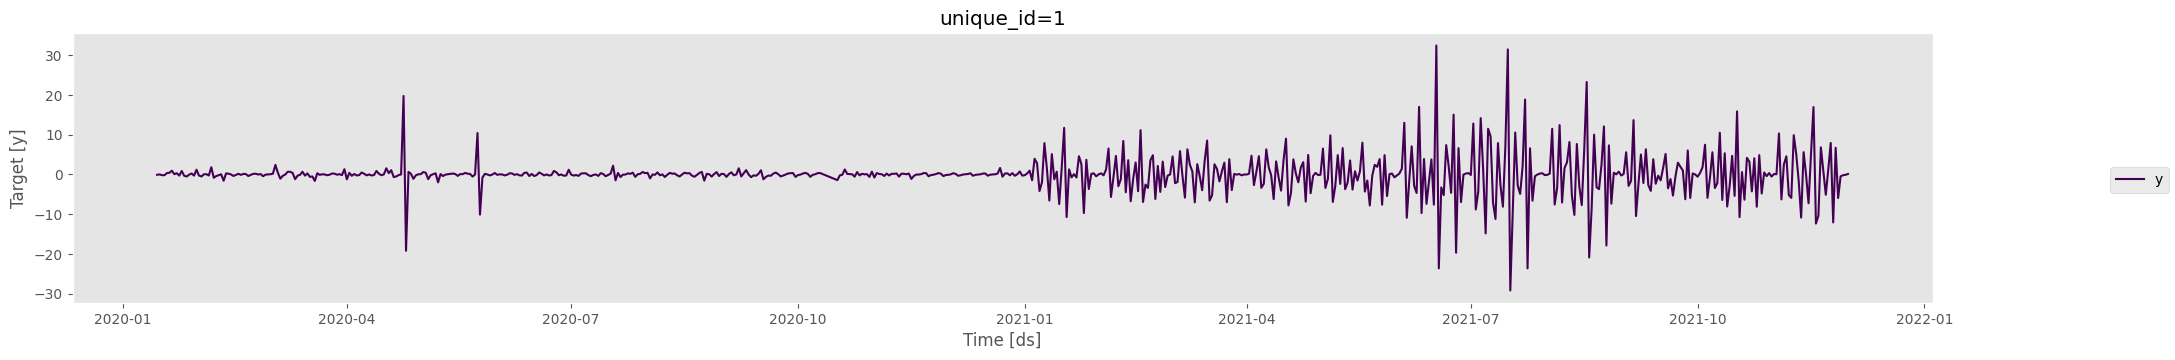

In [35]:
plot_series(prep)

## **Fit the Model**

In [36]:
# fit the models
mlf.fit(train,fitted=True,
        prediction_intervals=PredictionIntervals(n_windows=5, h=30, method="conformal_distribution") )

Learning rate set to 0.037035
0:	learn: 5.1206757	total: 58.4ms	remaining: 58.3s
1:	learn: 5.0816113	total: 58.9ms	remaining: 29.4s
2:	learn: 5.0300599	total: 59.3ms	remaining: 19.7s
3:	learn: 4.9729866	total: 59.8ms	remaining: 14.9s
4:	learn: 4.9281922	total: 60.2ms	remaining: 12s
5:	learn: 4.8861968	total: 60.6ms	remaining: 10s
6:	learn: 4.8503887	total: 61ms	remaining: 8.65s
7:	learn: 4.8008021	total: 61.4ms	remaining: 7.61s
8:	learn: 4.7535413	total: 61.8ms	remaining: 6.8s
9:	learn: 4.7064625	total: 62.2ms	remaining: 6.16s
10:	learn: 4.6681727	total: 62.7ms	remaining: 5.63s
11:	learn: 4.6354551	total: 63.1ms	remaining: 5.2s
12:	learn: 4.6055999	total: 63.6ms	remaining: 4.83s
13:	learn: 4.5659146	total: 64.2ms	remaining: 4.52s
14:	learn: 4.5317729	total: 64.6ms	remaining: 4.24s
15:	learn: 4.5056153	total: 65ms	remaining: 4s
16:	learn: 4.4889158	total: 65.5ms	remaining: 3.79s
17:	learn: 4.4538664	total: 65.8ms	remaining: 3.59s
18:	learn: 4.4184777	total: 66.3ms	remaining: 3.42s
19:	l

MLForecast(models=[RandomForestRegressor, AdaBoostRegressor, DecisionTreeRegressor, XGBRegressor, SVR, RANSACRegressor, HuberRegressor, TheilSenRegressor, KNeighborsRegressor, CatBoostRegressor], freq=D, lag_features=['lag1', 'lag2', 'lag3', 'expanding_mean_lag1', 'rolling_mean_lag7_window_size7'], date_features=['year', 'month', 'day'], num_threads=2)

In [37]:
result=mlf.forecast_fitted_values()
result=result.set_index("unique_id")
result

,ds,y,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor
unique_id,,,,,,,,,,,,
1,2020-01-15,231208,286691,1809660,231208,240728,260283,-699462,121323,1240515,211575,261327
1,2020-01-16,230912,221301,1780846,230912,227404,231537,-720136,151930,1192532,182761,198371
1,2020-01-17,173013,187158,1780550,173013,179488,231253,-650936,173012,1141559,209713,193727
1,2020-01-18,110225,141663,1627183,110225,107212,173360,-699598,143742,1119399,170890,182937
1,2020-01-19,216162,219033,1659863,216162,225939,110596,-809804,103180,1088353,159403,208547
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2021-11-27,342275,928761,1465718,342275,339708,2197328,1084016,2205254,2470728,728556,276272
1,2021-11-28,189405,254434,1064021,189405,189110,342422,1976219,837689,893418,388678,176539
1,2021-11-29,129855,268899,1999801,129855,131926,190705,-241062,834457,935476,151098,245766


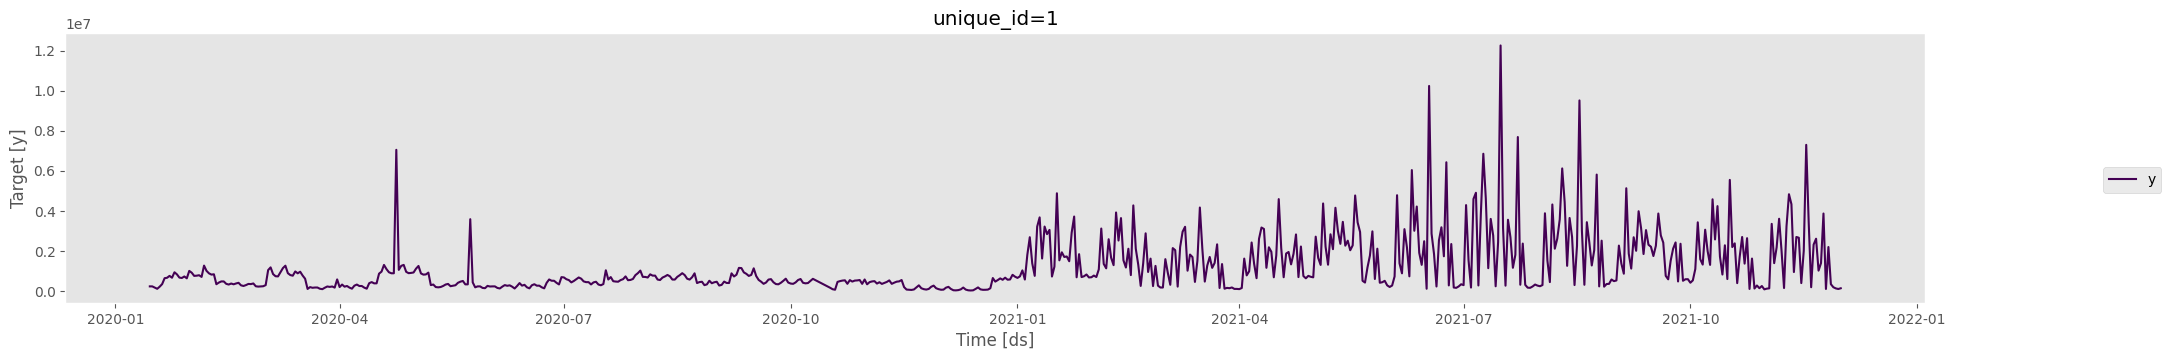

In [38]:
plot_series(result.reset_index())

## **Predict Method**
We will use the predict method to forecast the last 30 days for the sale total of Adidas. This method only has one parameter, the forecast horizon.

In [39]:
forecast_df = mlf.predict(h=30, level=[80,95]) 

forecast_df

,unique_id,ds,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,...,TheilSenRegressor-hi-80,TheilSenRegressor-hi-95,KNeighborsRegressor-lo-95,KNeighborsRegressor-lo-80,KNeighborsRegressor-hi-80,KNeighborsRegressor-hi-95,CatBoostRegressor-lo-95,CatBoostRegressor-lo-80,CatBoostRegressor-hi-80,CatBoostRegressor-hi-95
0,1,2021-12-02,1615015,2030755,3720392,853193,137363,90618,193939,279670,...,1912838,3032637,-804249,-478070,2077646,2403825,-503767,-384857,2170508,2289418
1,1,2021-12-03,3139344,4026305,1757910,1491450,137702,329657,161324,735229,...,3626591,3945577,-1192028,-948558,4838061,5081531,3805,881870,4089979,4968044
2,1,2021-12-04,1550816,2888312,685144,2450464,138064,291174,196158,712316,...,3135451,3933149,-34162,771717,3672104,4477983,-863493,-624177,3435404,3674720
3,1,2021-12-05,2870578,2130535,4560767,2927619,138424,328057,222819,740838,...,2548372,3431697,333490,1027835,3241371,3935716,349581,601427,3670863,3922710
4,1,2021-12-06,1969639,2517719,3492945,2851900,138791,338999,215589,981642,...,4176878,5780320,-1395076,-1164516,5341646,5572206,-259187,1820343,5466928,7546458
5,1,2021-12-07,1412484,2318552,2045767,2071739,139164,409955,226197,1107460,...,2627911,3830520,253966,630978,3516294,3893305,-734882,-304068,2878217,3309031
6,1,2021-12-08,3737758,2759781,6468956,1459216,139541,325939,253035,1021203,...,1968795,3850114,-1490848,-239274,4443393,5694967,-1027395,-959441,4526084,4594037
7,1,2021-12-09,3084646,3201009,3438378,2567800,139926,472642,231103,1324992,...,3760547,4428979,-1445799,-1001643,5311262,5755418,1712104,2140186,4425379,4853461
8,1,2021-12-10,2431807,2609668,5102033,2772513,140315,455363,242375,1407257,...,3190580,4691977,-2201277,-1274269,5556532,6483540,403732,867804,3201896,3665969
9,1,2021-12-11,3841517,3503763,2790108,2845683,140712,619448,233339,1596291,...,4479596,4672907,-2038861,-1996971,6222531,6264422,336978,1168123,4097250,4928395


## **Forecasting Plot**

In [50]:
dark_style = {
    'figure.facecolor': '333333', ##212946'
    'axes.facecolor': '333333',
    'savefig.facecolor':'333333',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

In [51]:
plot_series(train, forecast_df,  max_insample_length=200, palette="magma", engine="plotly")

<a id="6"></a>
# **Evaluate the model**

In [42]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [43]:
cv_result = mlf.cross_validation(
    train,
    n_windows=5,  # number of models to train/splits to perform
    h=30,  )

Learning rate set to 0.037035
0:	learn: 5.1206757	total: 635us	remaining: 635ms
1:	learn: 5.0816113	total: 1.09ms	remaining: 546ms
2:	learn: 5.0300599	total: 1.64ms	remaining: 546ms
3:	learn: 4.9729866	total: 2.15ms	remaining: 535ms
4:	learn: 4.9281922	total: 2.66ms	remaining: 529ms
5:	learn: 4.8861968	total: 3.06ms	remaining: 507ms
6:	learn: 4.8503887	total: 3.5ms	remaining: 496ms
7:	learn: 4.8008021	total: 3.96ms	remaining: 491ms
8:	learn: 4.7535413	total: 4.32ms	remaining: 476ms
9:	learn: 4.7064625	total: 4.73ms	remaining: 468ms
10:	learn: 4.6681727	total: 5.17ms	remaining: 465ms
11:	learn: 4.6354551	total: 5.64ms	remaining: 465ms
12:	learn: 4.6055999	total: 6.11ms	remaining: 464ms
13:	learn: 4.5659146	total: 6.59ms	remaining: 464ms
14:	learn: 4.5317729	total: 6.89ms	remaining: 452ms
15:	learn: 4.5056153	total: 7.44ms	remaining: 458ms
16:	learn: 4.4889158	total: 7.93ms	remaining: 459ms
17:	learn: 4.4538664	total: 8.39ms	remaining: 458ms
18:	learn: 4.4184777	total: 8.79ms	remaining: 

In [44]:
cv_result

,unique_id,ds,cutoff,y,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor
0,1,2021-07-05,2021-07-04,4594907,3190486,2296480,2377835,4159150,173530,-65973,1852303,1204438,2882144,3843044
1,1,2021-07-06,2021-07-04,4905963,2079259,2078036,1478046,2921908,174671,-721941,1692103,1697735,2048723,2131155
2,1,2021-07-07,2021-07-04,276519,1962583,2106977,237871,2988745,175752,-1345414,1221830,1331420,1607323,2270855
3,1,2021-07-08,2021-07-04,3861989,3528966,2210578,5543529,1609258,176900,-2035424,1486774,1022764,4163859,2364582
4,1,2021-07-09,2021-07-04,6854359,4338948,3770588,2512951,2186174,178076,-2293232,1473644,1417647,3635435,2258359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,2021-11-27,2021-11-01,342275,2347439,2069995,-243404,1360907,118427,-48657723,-137753,3114304,558965,1457061
146,1,2021-11-28,2021-11-01,189405,2363902,2211118,2882238,2731500,118735,-50527171,-179473,3208024,547606,1213417
147,1,2021-11-29,2021-11-01,129855,2317362,2304586,2011192,920340,119065,-52335721,-223276,3299007,530207,1449519
148,1,2021-11-30,2021-11-01,100678,2237470,2704594,1023086,1153830,119418,-54129903,-269189,3389997,506810,1246782


In [45]:
from datasetsforecast.losses import mse, mae, rmse

def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [46]:
evaluation_df = evaluate_cross_validation(cv_result.set_index("unique_id"), rmse)
evaluation_df

,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor,best_model
unique_id,,,,,,,,,,,
1,1827391,1940713,3057302,1853741,2375912,15082446,2130099,2379493,2489561,1717285,CatBoostRegressor


In [47]:
evaluation_df["best_model"].value_counts()

best_model
CatBoostRegressor    1
Name: count, dtype: int64

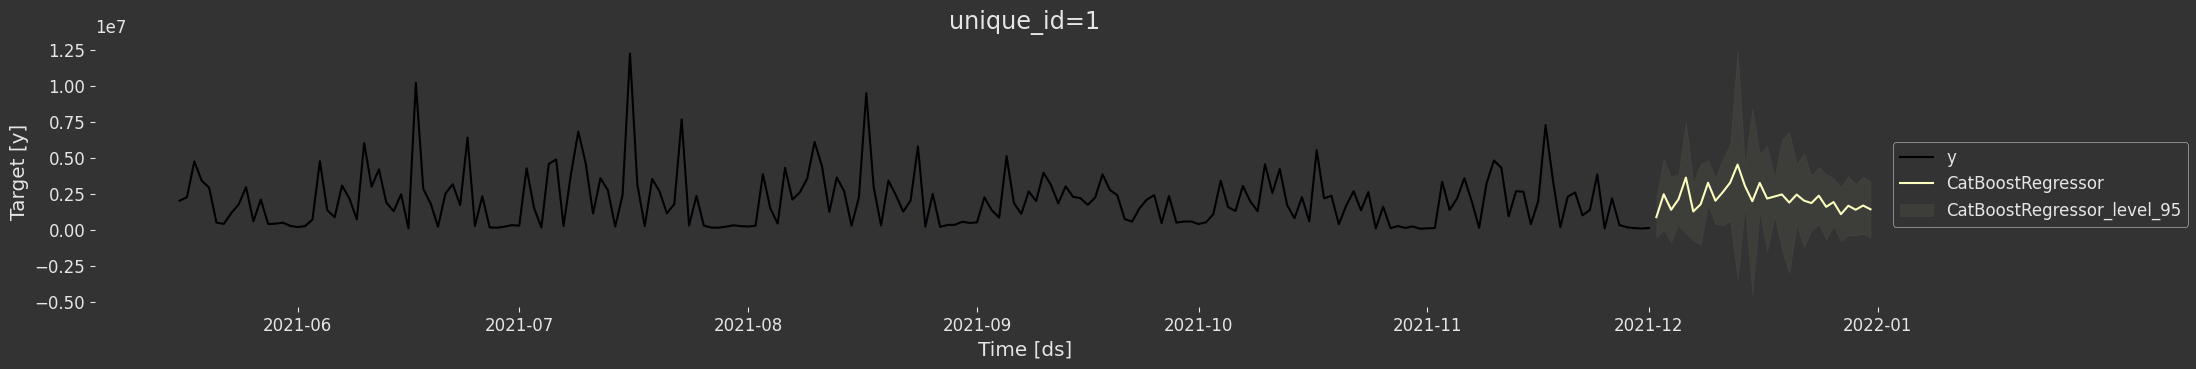

In [55]:
plot_series(train, forecast_df,  max_insample_length=200, palette="magma", models=["CatBoostRegressor"], level=[95] )

<a id="7"></a>
# **Exogenous variables**
We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

In [56]:
df_exo=df.groupby("ds")[["y",'Units Sold','Operating Profit','Total Cost']].sum().reset_index()
df_exo["unique_id"]="1"
df_exo

,ds,y,Units Sold,Operating Profit,Total Cost,unique_id
0,2020-01-01,845141,2361,382132,463009,1
1,2020-01-02,689410,2310,225947,463463,1
2,2020-01-03,632573,2302,202279,430294,1
3,2020-01-04,615080,2085,228235,386845,1
4,2020-01-05,707829,1917,222392,485437,1
...,...,...,...,...,...,...
719,2021-12-27,602353,1314,282960,319393,1
720,2021-12-28,301010,749,106359,194651,1
721,2021-12-29,211109,557,85281,125828,1
722,2021-12-30,167903,442,62110,105793,1


In [57]:
exogen=df_exo[["ds","unique_id", 'Units Sold','Operating Profit','Total Cost']]
exogen

,ds,unique_id,Units Sold,Operating Profit,Total Cost
0,2020-01-01,1,2361,382132,463009
1,2020-01-02,1,2310,225947,463463
2,2020-01-03,1,2302,202279,430294
3,2020-01-04,1,2085,228235,386845
4,2020-01-05,1,1917,222392,485437
...,...,...,...,...,...
719,2021-12-27,1,1314,282960,319393
720,2021-12-28,1,749,106359,194651
721,2021-12-29,1,557,85281,125828
722,2021-12-30,1,442,62110,105793


# **Splitting training and test data with exogenous variables**
<a id="8"></a>
Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 8 weekly to test and evaluate the performance of our model.

In [58]:
train_exo = df_exo[df_exo.ds<='2021-12-01'] 
test_exo=exogen[(exogen['ds'] > '2021-12-01')]

train_exo.shape, test_exo.shape

((694, 6), (30, 5))

<a id="9"></a>
# **Implementation of MlForecast with exogenous variables**

In [59]:
regresor_exo= [ RandomForestRegressor(),
           AdaBoostRegressor(),
           DecisionTreeRegressor(),
           XGBRegressor(),
           SVR(),
           RANSACRegressor(),
           HuberRegressor(),
           TheilSenRegressor(),
           KNeighborsRegressor(),
           CatBoostRegressor(),
        ]

In [60]:
mlf_exo = MLForecast(models=regresor_exo,
                 freq='D', 
                 lags=[1,2,3],
                 lag_transforms={1: [expanding_mean],7: [(rolling_mean, 7)] },
                 target_transforms=[Differences([1]), LocalRobustScaler(scale='iqr')],
                 date_features=["year", "month", "day"],
                 num_threads=2
                 ) 

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [61]:
# fit the models
mlf_exo.fit(train_exo, fitted=True, static_features= [],
         prediction_intervals=PredictionIntervals(n_windows=5, h=30, method="conformal_distribution"))

Learning rate set to 0.037035
0:	learn: 5.0944337	total: 1.58ms	remaining: 1.57s
1:	learn: 4.9851093	total: 2.28ms	remaining: 1.14s
2:	learn: 4.8981529	total: 2.95ms	remaining: 980ms
3:	learn: 4.8168023	total: 3.62ms	remaining: 900ms
4:	learn: 4.7447506	total: 4.27ms	remaining: 850ms
5:	learn: 4.6647546	total: 4.89ms	remaining: 810ms
6:	learn: 4.5799350	total: 5.58ms	remaining: 792ms
7:	learn: 4.5205740	total: 6.17ms	remaining: 765ms
8:	learn: 4.4481644	total: 6.85ms	remaining: 755ms
9:	learn: 4.3740040	total: 7.48ms	remaining: 740ms
10:	learn: 4.2973252	total: 8.06ms	remaining: 724ms
11:	learn: 4.2331738	total: 8.73ms	remaining: 719ms
12:	learn: 4.1761334	total: 9.33ms	remaining: 708ms
13:	learn: 4.1032265	total: 9.95ms	remaining: 701ms
14:	learn: 4.0344013	total: 10.5ms	remaining: 691ms
15:	learn: 3.9705858	total: 11.2ms	remaining: 689ms
16:	learn: 3.9030544	total: 11.8ms	remaining: 684ms
17:	learn: 3.8384860	total: 12.5ms	remaining: 680ms
18:	learn: 3.7868158	total: 13.1ms	remaining

MLForecast(models=[RandomForestRegressor, AdaBoostRegressor, DecisionTreeRegressor, XGBRegressor, SVR, RANSACRegressor, HuberRegressor, TheilSenRegressor, KNeighborsRegressor, CatBoostRegressor], freq=D, lag_features=['lag1', 'lag2', 'lag3', 'expanding_mean_lag1', 'rolling_mean_lag7_window_size7'], date_features=['year', 'month', 'day'], num_threads=2)

In [62]:
result_exo=mlf_exo.forecast_fitted_values()
result_exo=result_exo.set_index("unique_id")
result_exo

,ds,y,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor
unique_id,,,,,,,,,,,,
1,2020-01-15,231208,238192,15778,231208,230609,232618,7864002,23320,4219792,264812,236258
1,2020-01-16,230912,224472,-13036,230912,230000,203619,7617233,21350,4143620,-1596673,215356
1,2020-01-17,173013,191839,-13332,173013,174212,205526,7013316,-18427,3821641,-470490,183853
1,2020-01-18,110225,118395,-71231,110225,110219,153976,7105959,-87357,3869938,43933,118950
1,2020-01-19,216162,203702,-134019,216162,213334,84413,7363103,-138071,4000744,124375,202491
...,...,...,...,...,...,...,...,...,...,...,...,...
1,2021-11-27,342275,450199,1454845,342275,341593,2176317,2230901,2117984,1486260,1774199,341723
1,2021-11-28,189405,182881,64879,189405,187159,316015,383502,111028,472498,-397116,183100
1,2021-11-29,129855,103797,-87991,129855,129755,167079,202847,-77578,14871,168322,116837


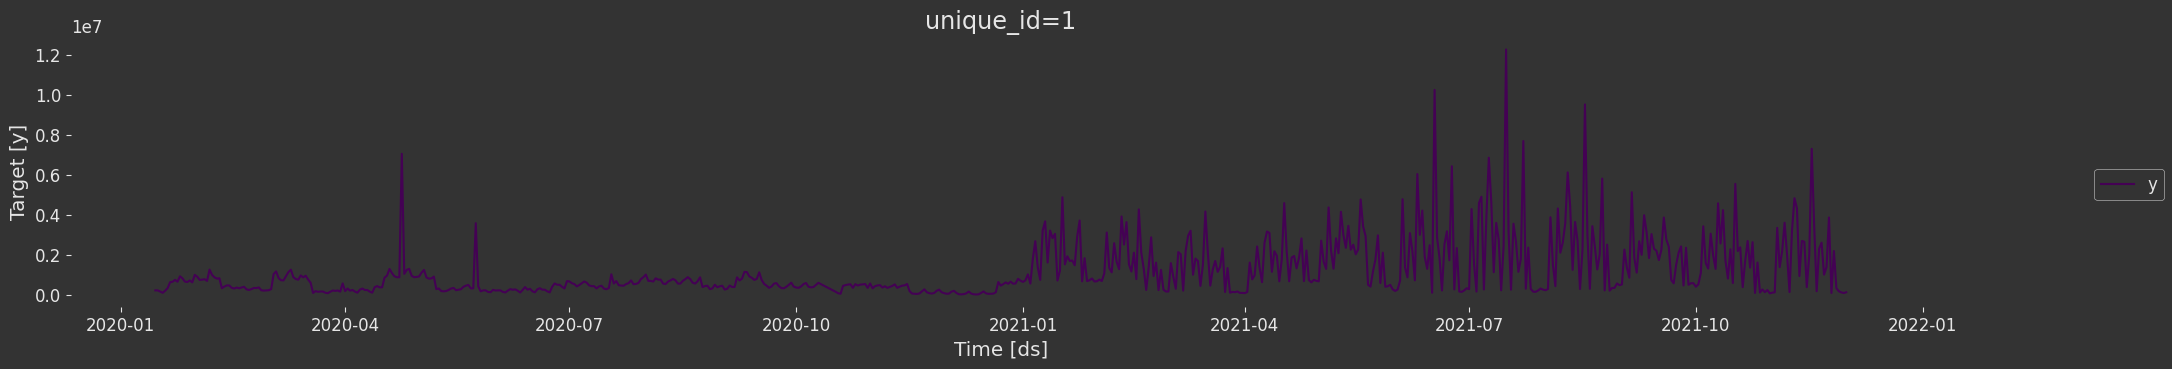

In [63]:
plot_series(result_exo.reset_index())

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [64]:
forecast_df_exo = mlf_exo.predict(h=30, level=[80,95], X_df=test_exo) 

forecast_df_exo.head()

,unique_id,ds,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,...,TheilSenRegressor-hi-80,TheilSenRegressor-hi-95,KNeighborsRegressor-lo-95,KNeighborsRegressor-lo-80,KNeighborsRegressor-hi-80,KNeighborsRegressor-hi-95,CatBoostRegressor-lo-95,CatBoostRegressor-lo-80,CatBoostRegressor-hi-80,CatBoostRegressor-hi-95
0,1,2021-12-02,4105686,3339828,4194589,4325322,2910711,5066286,3323338,3080907,...,3901845,4004483,75542,411559,2819177,3155195,3616611,3667566,4605873,4656828
1,1,2021-12-03,2072538,2251357,1987801,2304716,3039732,5922229,4152394,1878636,...,2810632,2885745,-1787963,-1376441,3061201,3472722,1224653,1235574,2393753,2404674
2,1,2021-12-04,2808921,2968580,2387121,2762058,3713201,6653808,5437049,2656437,...,3574443,4844316,-3619195,-1199420,2830358,5250132,1087236,1512268,3701112,4126145
3,1,2021-12-05,4830552,5399792,3987405,4831204,6615335,9497213,8732441,4933455,...,6926349,6951419,-1054914,-961168,6905997,6999743,4132149,4162327,5382862,5413041
4,1,2021-12-06,3239280,4089855,1983225,3127254,7155524,9524992,9914831,4259269,...,6000199,6348546,-1600859,-1423940,8283932,8460851,1907192,2009179,4384644,4486631


## **Forecasting Plot**

In [65]:
actual_exo=df_exo[df_exo.ds>'2021-12-01'] 

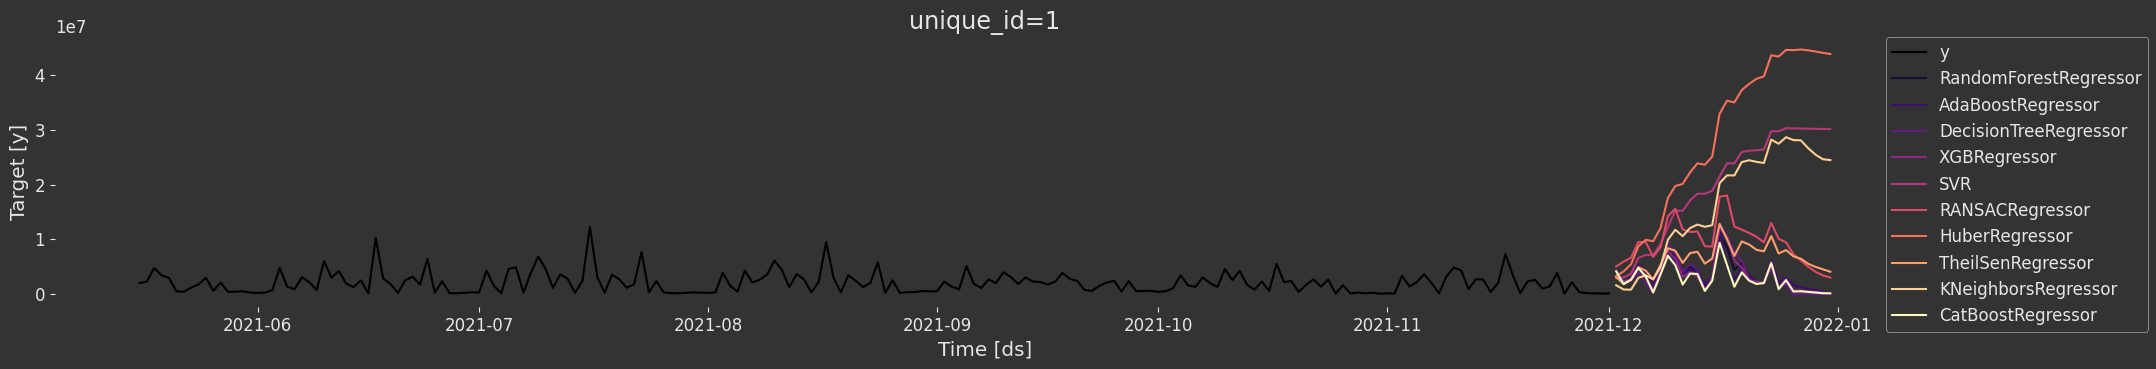

In [66]:
plot_series(train_exo, forecast_df_exo,  max_insample_length=200,   palette="magma")

<a id="10"></a>
# **Evaluate the model for exogenous variables**

In [67]:
cv_result_exo = mlf_exo.cross_validation(
    train_exo,
    n_windows=5,  # number of models to train/splits to perform
    h=30,  )

Learning rate set to 0.037035
0:	learn: 5.0944337	total: 655us	remaining: 655ms
1:	learn: 4.9851093	total: 1.27ms	remaining: 635ms
2:	learn: 4.8981529	total: 1.86ms	remaining: 618ms
3:	learn: 4.8168023	total: 2.4ms	remaining: 597ms
4:	learn: 4.7447506	total: 2.92ms	remaining: 582ms
5:	learn: 4.6647546	total: 3.43ms	remaining: 568ms
6:	learn: 4.5799350	total: 3.96ms	remaining: 562ms
7:	learn: 4.5205740	total: 4.51ms	remaining: 559ms
8:	learn: 4.4481644	total: 5.06ms	remaining: 557ms
9:	learn: 4.3740040	total: 5.66ms	remaining: 560ms
10:	learn: 4.2973252	total: 6.3ms	remaining: 567ms
11:	learn: 4.2331738	total: 6.92ms	remaining: 570ms
12:	learn: 4.1761334	total: 7.61ms	remaining: 577ms
13:	learn: 4.1032265	total: 8.19ms	remaining: 577ms
14:	learn: 4.0344013	total: 8.8ms	remaining: 578ms
15:	learn: 3.9705858	total: 9.4ms	remaining: 578ms
16:	learn: 3.9030544	total: 9.99ms	remaining: 577ms
17:	learn: 3.8384860	total: 10.6ms	remaining: 577ms
18:	learn: 3.7868158	total: 11.2ms	remaining: 580

In [68]:
cv_result_exo

,unique_id,ds,cutoff,y,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor
0,1,2021-07-05,2021-07-04,4594907,9894,-21914,218794,17891,149978,753656,-5412,703293,-529684,193500
1,1,2021-07-06,2021-07-04,4905963,-47588,-215545,259605,-9379,128238,1193921,-182587,872683,-1231087,165425
2,1,2021-07-07,2021-07-04,276519,-28077,-409177,182217,3606,106498,599942,-359765,364689,-1932489,98672
3,1,2021-07-08,2021-07-04,3861989,-46439,-602809,46696,30149,84758,250902,-536938,241372,-2633892,110873
4,1,2021-07-09,2021-07-04,6854359,-44154,-796440,137436,1222,63017,-44361,-714113,-160421,-3335294,53170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,2021-11-27,2021-11-01,342275,91680,-3676059,-46217,160240,-424133,-424721,-7325658,-2733660,-31936047,-51455
146,1,2021-11-28,2021-11-01,189405,111538,-3821997,-62601,2359,-444997,-394969,-7611969,-2797533,-33168908,-35714
147,1,2021-11-29,2021-11-01,129855,102869,-3967935,-76452,5534,-465862,-372404,-7898281,-2855117,-34401768,-19991
148,1,2021-11-30,2021-11-01,100678,104878,-4113873,-7796,25348,-486726,-348252,-8184592,-2916088,-35634629,-21867


In [75]:
evaluation_df_exo = evaluate_cross_validation(cv_result_exo.set_index("unique_id"), rmse)
print("sin exogenas")
evaluation_df_exo

sin exogenas


,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor,best_model
unique_id,,,,,,,,,,,
1,2884466,3679661,15006182,2934572,10933056,6694457,14376474,4673749,23908394,2539332,CatBoostRegressor


In [76]:
print("Con Exogenas")
evaluate_cross_validation(cv_result.set_index("unique_id"), rmse)

Con Exogenas


,RandomForestRegressor,AdaBoostRegressor,DecisionTreeRegressor,XGBRegressor,SVR,RANSACRegressor,HuberRegressor,TheilSenRegressor,KNeighborsRegressor,CatBoostRegressor,best_model
unique_id,,,,,,,,,,,
1,1827391,1940713,3057302,1853741,2375912,15082446,2130099,2379493,2489561,1717285,CatBoostRegressor


<a id="11"></a>
# **Conclusion**
Al analizar los resultados de las ventas de Adidas utilizando la métrica RMSE, tanto sin variables exógenas como con variables exógenas, podemos comparar los valores obtenidos por cada modelo:

Sin variables exógenas:
- RandomForestRegressor: RMSE = 2,884,466
- AdaBoostRegressor: RMSE = 3,679,661
- DecisionTreeRegressor: RMSE = 15,006,182
- XGBRegressor: RMSE = 2,934,572
- SVR: RMSE = 10,933,056
- RANSACRegressor: RMSE = 6,694,457
- HuberRegressor: RMSE = 14,376,474
- TheilSenRegressor: RMSE = 4,673,749
- KNeighborsRegressor: RMSE = 23,908,394
- CatBoostRegressor: RMSE = 2,539,332

Con variables exógenas:
- RandomForestRegressor: RMSE = 1,827,391
- AdaBoostRegressor: RMSE = 1,940,713
- DecisionTreeRegressor: RMSE = 3,057,302
- XGBRegressor: RMSE = 1,853,741
- SVR: RMSE = 2,375,912
- RANSACRegressor: RMSE = 15,082,446
- HuberRegressor: RMSE = 2,130,099
- TheilSenRegressor: RMSE = 2,379,493
- KNeighborsRegressor: RMSE = 2,489,561
- CatBoostRegressor: RMSE = 1,717,285

Al comparar los resultados, podemos observar que en ambos casos el modelo CatBoostRegressor obtiene el valor más bajo de RMSE. Sin variables exógenas, su RMSE es de 2,539,332, mientras que con variables exógenas su RMSE es de 1,717,285.

Esto sugiere que el modelo CatBoostRegressor es consistente en su rendimiento y logra ajustarse mejor a los datos tanto con como sin variables exógenas. Sin embargo, al considerar las variables exógenas, el modelo mejora su capacidad de predicción, ya que logra obtener un valor de RMSE más bajo en comparación con el caso sin variables exógenas.

Es importante tener en cuenta que el RMSE es una medida de la diferencia entre los valores predichos y los valores reales, y un valor más bajo indica un mejor ajuste. Sin embargo, es necesario considerar otros factores y métricas de evaluación para obtener una comprensión completa del rendimiento del modelo.

En resumen, los resultados indican que el modelo CatBoostRegressor, especialmente cuando se incluyen variables exógenas, muestra un buen rendimiento en la predicción de las ventas de Adidas, con un RMSE más bajo en comparación con otros modelos. Esto sugiere que el CatBoostRegressor puede ser una opción sólida para predecir las ventas de Adidas en base a los datos disponibles.

<a id="12"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
3. [Exponential smoothing](https://nixtla.github.io/statsforecast/docs/models/autoets.html#table-of-contents)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)

